<a href="https://colab.research.google.com/github/kansai-pg/Python/blob/master/11_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1.1 wgetコマンド以下のURLからでファイル（mytype.csv）をダウンロードしてください。

!wget https://gist.githubusercontent.com/murayama333/11171cac80fddfc1ef0f5ad753ae0076/raw/3c79d9ddbfa5fc3e622f37631f95602fe1da1266/mytype.csv

--2021-03-01 04:35:00--  https://gist.githubusercontent.com/murayama333/11171cac80fddfc1ef0f5ad753ae0076/raw/3c79d9ddbfa5fc3e622f37631f95602fe1da1266/mytype.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11558 (11K) [text/plain]
Saving to: ‘mytype.csv’

mytype.csv          100%[===================>]  11.29K  --.-KB/s    in 0s      

2021-03-01 04:35:01 (89.5 MB/s) - ‘mytype.csv’ saved [11558/11558]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#1.2 pandasのDataFrameで mytype.csv を表示してください。
mytype_df = pd.read_csv("mytype.csv")
mytype_df

,f1,f2,type
0,2.286632,5.994033,0
1,4.184063,6.213322,0
2,8.176970,13.296028,1
3,3.020003,5.302735,0
4,3.471054,6.921841,0
...,...,...,...
295,1.693205,7.712895,0
296,9.860533,11.758099,1
297,4.805633,9.018470,0
298,9.143350,12.887626,1


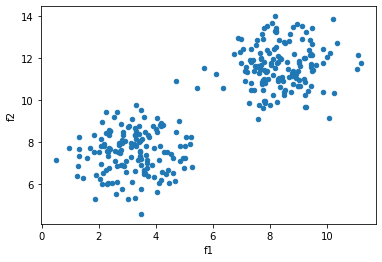

In [ ]:
#1.3 DataFrame（mytype_df）の f1 と f2 の散布図を表示してください。
mytype_df.plot.scatter("f1", "f2")

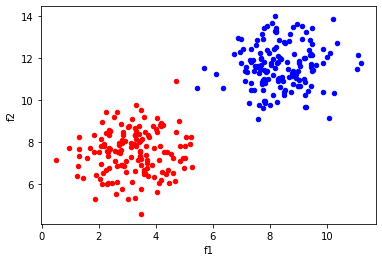

In [ ]:
#1.4 DataFrame（mytype_df）の f1 と f2 の散布図を表示してください。ただし、type == 0 のデータは赤色、type == 1 のデータは青色で表示してください。
ax = mytype_df[mytype_df["type"] == 0].plot.scatter("f1", "f2", color="red")
mytype_df[mytype_df["type"] == 1].plot.scatter("f1", "f2", color="blue", ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#1.5 DataFrame（mytype_df）のデータを訓練データ75件、テストデータ25件に分割してください。
x_train, x_test, y_train, y_test = train_test_split(mytype_df[["f1", "f2"]].values, mytype_df["type"].values, random_state=1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 2)
(75, 2)
(225,)
(75,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#1.6 ロジスティック回帰によって、DataFrame（mytype_df）の訓練データで学習して、係数と切片を表示してください。
clf = LogisticRegression()
clf.fit(x_train, y_train)

print(clf.coef_)
print(clf.intercept_)

[[1.86005888 1.04551713]]
[-21.10019839]


In [ ]:
#1.7 以下のデータ sample_x を使って、結果を推論してください。
sample_x = [[5.5, 4.2], [12.5, 10.8]]

clf.predict(sample_x)

array([0, 1])

In [ ]:
#1.8 テストデータを使ってモデルを評価して、正答率（Accuracy） を表示してください。
clf.score(x_test, y_test)
#https://qiita.com/ekzemplaro/items/2a7ab30ab577b122c554

1.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


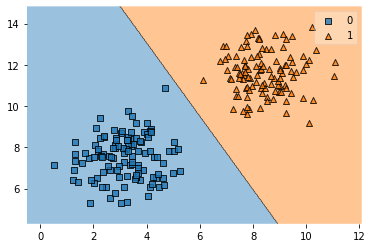

In [ ]:
#1.9 mlextend を使って散布図に境界線を描画してください。
plot_decision_regions(x_train, y_train, clf=clf)
#https://qiita.com/altescy/items/60a6def66f13267f6347

#演習2 k−NN法

In [ ]:
#2.1 wgetコマンド以下のURLからでファイル（sepal_iris.csv）をダウンロードしてください
!wget https://gist.githubusercontent.com/murayama333/85cf39da7271abc8506118a6796d52a5/raw/478374786d259ed3d341ea06b59fec73f27129a0/sepal_iris.csv

--2021-03-01 04:59:57--  https://gist.githubusercontent.com/murayama333/85cf39da7271abc8506118a6796d52a5/raw/478374786d259ed3d341ea06b59fec73f27129a0/sepal_iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1123 (1.1K) [text/plain]
Saving to: ‘sepal_iris.csv’

sepal_iris.csv      100%[===================>]   1.10K  --.-KB/s    in 0s      

2021-03-01 04:59:57 (75.4 MB/s) - ‘sepal_iris.csv’ saved [1123/1123]



In [ ]:
iris_df = pd.read_csv("sepal_iris.csv")
iris_df

,length_mm,width_cm,cls
0,51.0,3.5,0
1,49.0,3.0,0
2,47.0,3.2,0
3,46.0,3.1,0
4,50.0,3.6,0
...,...,...,...
95,57.0,3.0,1
96,57.0,2.9,1
97,62.0,2.9,1
98,51.0,2.5,1


In [ ]:
mm = iris_df["length_mm"]
convert = mm / 10
iris_df['length_cm'] = convert
iris_df
#https://onecompiler.com/posts/3thnszfx8/python-program-to-convert-millimeters-into-centimeters

,length_mm,width_cm,cls,length_cm
0,51.0,3.5,0,5.1
1,49.0,3.0,0,4.9
2,47.0,3.2,0,4.7
3,46.0,3.1,0,4.6
4,50.0,3.6,0,5.0
...,...,...,...,...
95,57.0,3.0,1,5.7
96,57.0,2.9,1,5.7
97,62.0,2.9,1,6.2
98,51.0,2.5,1,5.1


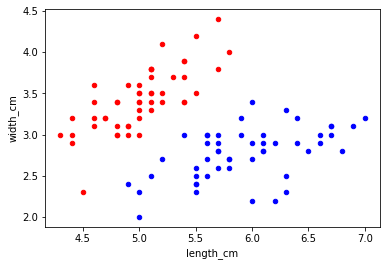

In [ ]:
#2.4 DataFrame（iris_df）の length_cm と width_cm の散布図を表示してください。ただし cls == 0 のデータは赤色、cls == 1 のデータは青色で表示するものとします。
ax = iris_df[iris_df["cls"] == 0].plot.scatter("length_cm", "width_cm", color="red")
iris_df[iris_df["cls"] == 1].plot.scatter("length_cm", "width_cm", color="blue", ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split

In [102]:
#2.5 DataFrame(iris_df）のデータを訓練データ50件、テストデータ50件に分割してください。
x_train, x_test, y_train, y_test = train_test_split(iris_df[['length_cm', 'width_cm']].values, iris_df['cls'].values, train_size=0.5, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50, 2)
(50, 2)
(50,)
(50,)


In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
#2.6 k-NN法によって、DataFrame（iris_df）の訓練データで学習して、正答率（Accuracy）を表示してください。
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.98


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


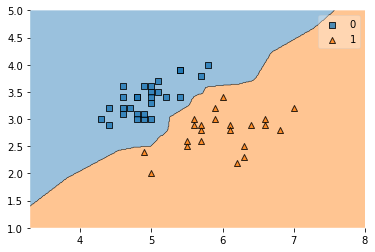

In [112]:
#2.7 mlextend を使って散布図に境界線を描画してください。
plot_decision_regions(x_train, y_train, clf=clf)